In [26]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [27]:
# Remove pandas duplication of the first column within the file
df = pd.read_csv('./churn_clean.csv', index_col=0)

In [4]:
# View data types and column information, dataframe as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [156]:
# View data counts to ensure appropriate values for Tenure
df.Tenure.describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [157]:
# View values for Age
df.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [158]:
# View data counts to ensure appropriate values for Income
df.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [159]:
# View data counts to ensure appropriate values for Marital
df.Marital.value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [160]:
# View data counts to ensure appropriate values for Gender
df.Gender.value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [161]:
# View data counts to ensure appropriate values for Outages
df.Outage_sec_perweek.describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [162]:
# View values for Yearly equipment failure
df.Yearly_equip_failure.describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [163]:
# View data counts to ensure appropriate values for Contract
df.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [164]:
# View data counts to ensure appropriate values for Internet Service
df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [165]:
# View data counts to ensure appropriate values for Multiple
df.Multiple.value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [166]:
# View data counts to ensure appropriate values for Tech Support
df.TechSupport.value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [167]:
# View data counts to ensure appropriate values for Monthly Charge
df.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [168]:
# View data counts to ensure appropriate values for Bandwidth
df.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [169]:
# Check for missing values
print(df.isnull().sum())

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

In [170]:
# Check for duplicates
duplicates = df.duplicated(keep=False)
duplicate_rows = df[duplicates]
print(df.duplicated().value_counts())

False    10000
dtype: int64


In [28]:
# Clean up and prepare the data
# Rename the Case order column for proper spacing
df = df.rename(columns={'Caseorder': 'Case_order'})

# Rename the Outage column for proper spacing
df = df.rename(columns={'Outage_sec_perweek': 'Outage_sec_per_week'})

# Rename the Onlinesecurity column for proper spacing
df = df.rename(columns={'OnlineSecurity': 'Online_Security'})

# Rename the Internetservice column for proper spacing
df = df.rename(columns={'InternetService': 'Internet_Service'})

# Rename the Onlinebackup column for proper spacing
df = df.rename(columns={'OnlineBackup': 'Online_Backup'})

# Rename the Deviceprotection column for proper spacing
df = df.rename(columns={'DeviceProtection': 'Device_Protection'})

# Rename the Techsupport column for proper spacing
df = df.rename(columns={'TechSupport': 'Tech_Support'})

# Rename the Streamingtv column for proper spacing
df = df.rename(columns={'StreamingTV': 'Streaming_TV'})

# Rename the Streamingmovies column for proper spacing
df = df.rename(columns={'StreamingMovies': 'Streaming_Movies'})

# Rename the Paperlessbilling column for proper spacing
df = df.rename(columns={'PaperlessBilling': 'Paperless_Billing'})

# Rename the Paymentmethod column for proper spacing
df = df.rename(columns={'PaymentMethod': 'Payment_Method'})

# Rename the Monthlycharge column for proper spacing
df = df.rename(columns={'MonthlyCharge': 'Monthly_Charge'})

# Minimalize decimal places in applicable columns
df["Age"] = df.Age.round(2)
df["Outage_sec_per_week"] = df.Outage_sec_per_week.round(2)
df["Yearly_equip_failure"] = df.Yearly_equip_failure.round(2)
df["Monthly_Charge"] = df.Monthly_Charge.round(2)
df["Bandwidth_GB_Year"] = df.Bandwidth_GB_Year.round(2)

# Convert Marital column to category from object
df["Marital"] = df["Marital"].astype("category")

# Convert Gender column to category from object
df["Gender"] = df["Gender"].astype("category")

# Convert Internet Service column to category from object
df["Internet_Service"] = df["Internet_Service"].astype("category")

# Convert Payment Method column to category from object
df["Payment_Method"] = df["Payment_Method"].astype("category")

# Convert Contract column to category from object
df["Contract"] = df["Contract"].astype("category")

# Change all yes/no values to 1 or 0 by mapping
mapping = {'Yes': 1, 'No': 0, 'unknown': np.nan}

# Apply the mapping to applicable columns
convert = ["Multiple" , "Tech_Support"]
df[convert] = df[convert].replace(mapping)

# Create dummy variables for applicable columns and new dataframe 
Dummy_Variables = ["Gender", "Marital", "Internet_Service", "Contract"]
dummy_dfs = [] 
for column in Dummy_Variables: 
    dummy_df = pd.get_dummies(data=df[column], prefix=column, drop_first=True) 
    dummy_dfs.append(dummy_df) 
    model_df = df[["Age", "Income" , "Outage_sec_per_week", "Yearly_equip_failure", 
"Multiple", "Tech_Support", "Tenure" , "Monthly_Charge", "Bandwidth_GB_Year"]] 

# Concatenate the dummy variables/df with the original df 
model_df = pd.concat([model_df] + dummy_dfs, axis=1) 

# Visually inspect the new dataframe 
pd.set_option("display.max_columns", None) 
print(model_df.head(5)) 

           Age    Income  Outage_sec_per_week  Yearly_equip_failure  Multiple  \
CaseOrder                                                                       
1           68  28561.99                 7.98                     1         0   
2           27  21704.77                11.70                     1         1   
3           50   9609.57                10.75                     1         1   
4           48  18925.23                14.91                     0         0   
5           83  40074.19                 8.15                     1         0   

           Tech_Support     Tenure  Monthly_Charge  Bandwidth_GB_Year  \
CaseOrder                                                               
1                     0   6.795513          172.46             904.54   
2                     0   1.156681          242.63             800.98   
3                     0  15.754144          159.95            2054.71   
4                     0  17.087227          119.96            2164.

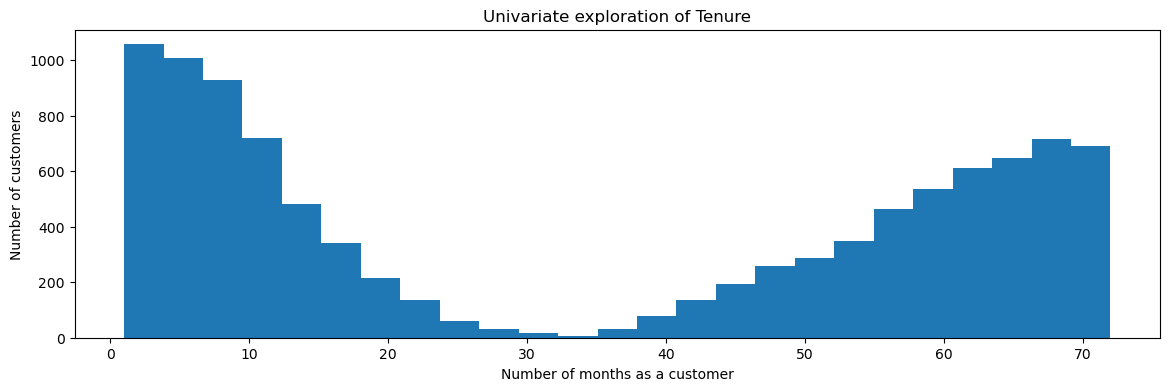

In [172]:
# Determine size of visualization
plt.figure(figsize = [14,4])
#Univariate exploration of Tenure
plt.title("Univariate exploration of Tenure")
bins = np.arange(0, df["Tenure"].max() + 2, 1)
plt.hist(model_df["Tenure"], bins=25)
plt.xlabel("Number of months as a customer")
plt.ylabel("Number of customers")
plt.show()

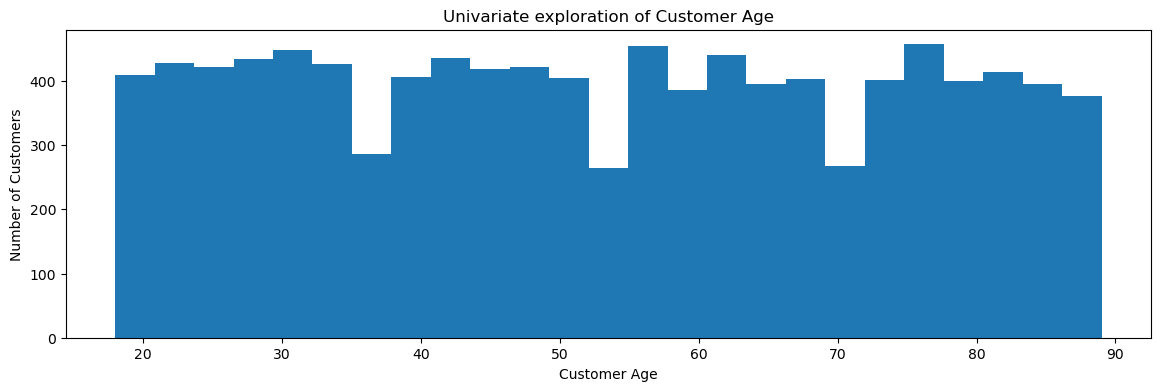

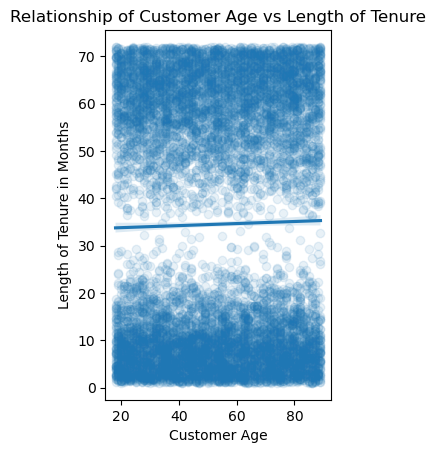

In [173]:
# Determine size of visualization
plt.figure(figsize = [14,4])

# First plot: Univariate exploration of Age
plt.title("Univariate exploration of Customer Age")
bins = np.arange(0, df["Age"].max() + 2, 1)
plt.hist(model_df["Age"], bins=25)
plt.xlabel("Customer Age")
plt.ylabel("Number of Customers")
plt.show()

# Second plot: Bivariate exploration of Age vs Tenure
plt.subplot(1, 2, 2)
plt.title("Relationship of Customer Age vs Length of Tenure")
sns.regplot(data=model_df, x="Age", y="Tenure", scatter_kws={'alpha' : 1/10})
plt.xlabel("Customer Age")
plt.ylabel("Length of Tenure in Months")
plt.show()

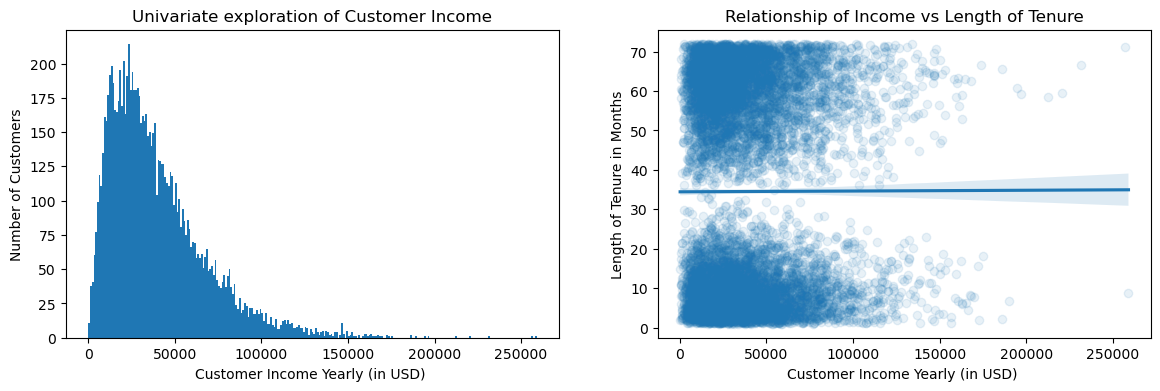

In [174]:
# Determine size of visualization
plt.figure(figsize = [14,4])

# First plot: Univariate exploration of income
plt.subplot(1, 2, 1)
plt.title('Univariate exploration of Customer Income')
bins = np.arange(0, df.Income.max() + 500, 1000)
plt.hist(data=model_df, x="Income", bins=bins)
plt.xlabel('Customer Income Yearly (in USD) ')
plt.ylabel("Number of Customers")

# Second plot: Bivariate exploration of income vs tenure
plt.subplot(1, 2, 2)
plt.title("Relationship of Income vs Length of Tenure")
sns.regplot(data=model_df, x="Income", y="Tenure", scatter_kws={'alpha' : 1/10})
plt.xlabel("Customer Income Yearly (in USD) ")
plt.ylabel("Length of Tenure in Months")
plt.show()

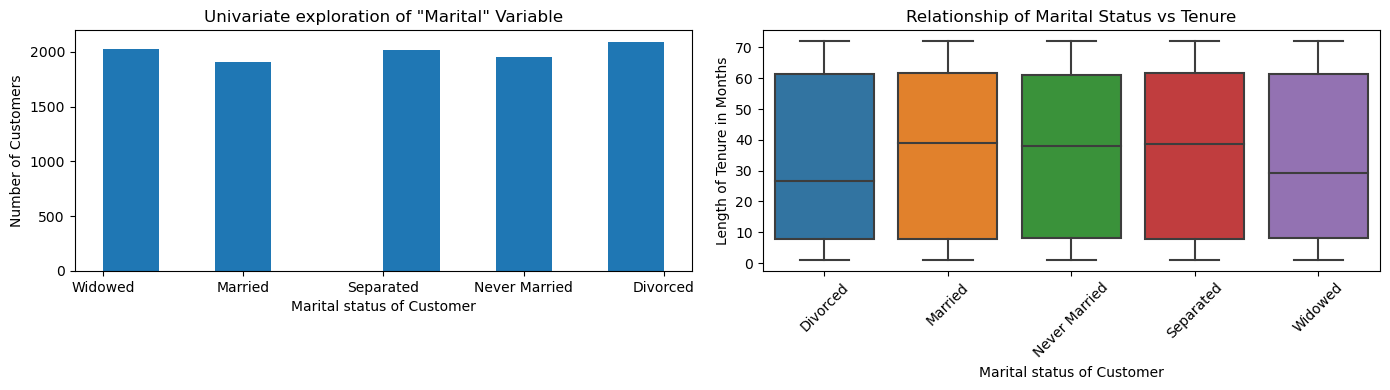

In [175]:
# Determine size of visualization
plt.figure(figsize = [14,4])

# First plot: Univariate exploration of Marital Variable
plt.subplot(1, 2, 1)
plt.title('Univariate exploration of "Marital" Variable')
Marital_counts = df["Marital"].value_counts()
Marital_labels = ["Divorced", "Widowed", "Separated", "Never Married", "Married"]
plt.hist(x=df["Marital"], bins=10)
plt.xlabel('Marital status of Customer')
plt.ylabel("Number of Customers")

# Second plot: Bivariate exploration of Marital vs Tenure
plt.subplot(1, 2, 2)
plt.title("Relationship of Marital Status vs Tenure")
sns.boxplot(data=df, x="Marital", y="Tenure")
plt.xlabel("Marital status of Customer")
plt.ylabel("Length of Tenure in Months")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

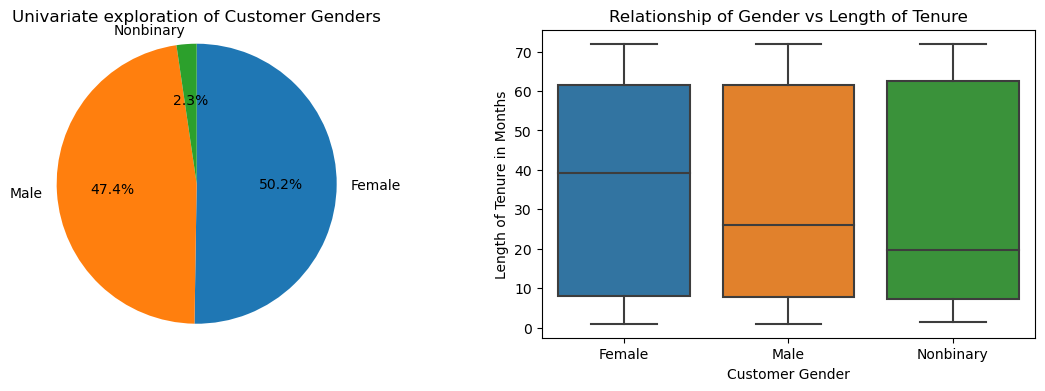

In [176]:
# Determine size of visualization
plt.figure(figsize = [14,4])

# First plot: Univariate exploration of Gender
plt.subplot(1, 2, 1)
plt.title("Univariate exploration of Customer Genders")
Gender_counts = df["Gender"].value_counts()
plt.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square')

# Second plot: Bivariate exploration of Gender vs Tenure
plt.subplot(1, 2, 2)
plt.title("Relationship of Gender vs Length of Tenure")
sns.boxplot(data=df, x="Gender", y='Tenure')
plt.xlabel("Customer Gender")
plt.ylabel("Length of Tenure in Months")
plt.show()

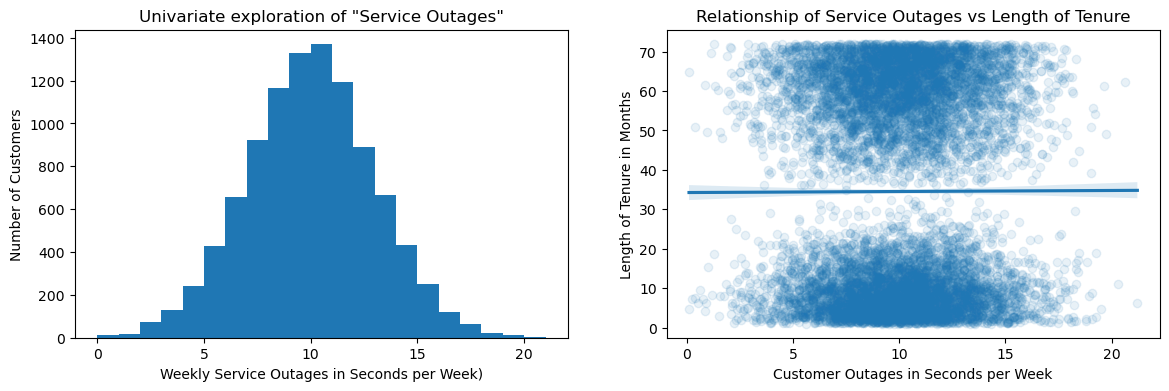

In [177]:
# Determine size of visualization
plt.figure(figsize = [14,4])

# First plot: Univariate exploration of Outage Variable
plt.subplot(1, 2, 1)
plt.title('Univariate exploration of "Service Outages"')
bins = np.arange(0, df.Outage_sec_per_week.max())
plt.hist(data=model_df, x="Outage_sec_per_week", bins=bins)
plt.xlabel('Weekly Service Outages in Seconds per Week)')
plt.ylabel("Number of Customers")

# Second plot: Bivariate exploration of Outages vs Tenure
plt.subplot(1, 2, 2)
plt.title("Relationship of Service Outages vs Length of Tenure")
sns.regplot(data=model_df, x="Outage_sec_per_week", y="Tenure", scatter_kws={'alpha' : 1/10})
plt.xlabel("Customer Outages in Seconds per Week")
plt.ylabel("Length of Tenure in Months")
plt.show()

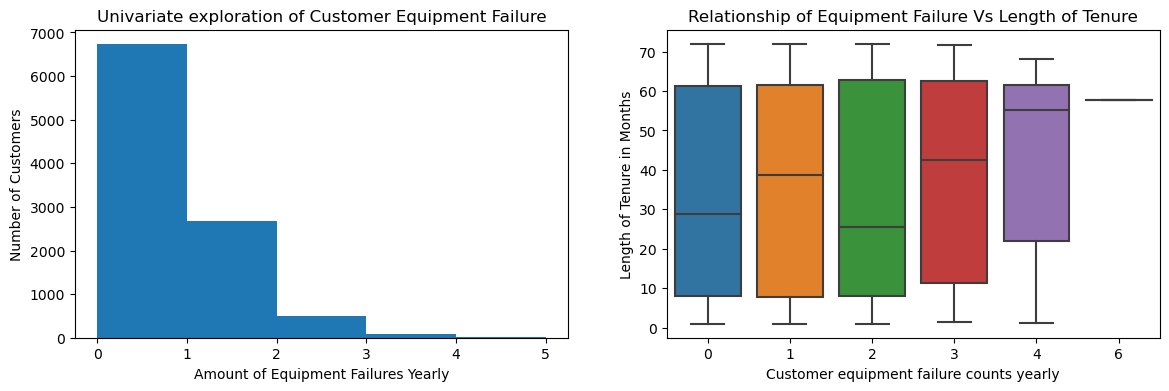

In [178]:
# Determine size of visualization
plt.figure(figsize = [14,4])

# First plot: Univariate exploration of Customer Equipment Failure
plt.subplot(1, 2, 1)
plt.title("Univariate exploration of Customer Equipment Failure")
bins = np.arange(0, model_df.Yearly_equip_failure.max())
plt.hist(data=model_df, x="Yearly_equip_failure", bins=bins)
plt.xlabel('Amount of Equipment Failures Yearly')
plt.ylabel("Number of Customers")

# Second plot: Bivariate exploration of Equipment Failure vs Tenure
plt.subplot(1, 2, 2)
plt.title("Relationship of Equipment Failure Vs Length of Tenure")
sns.boxplot(data=model_df, x="Yearly_equip_failure", y='Tenure')
plt.xlabel("Customer equipment failure counts yearly")
plt.ylabel("Length of Tenure in Months")
plt.show()

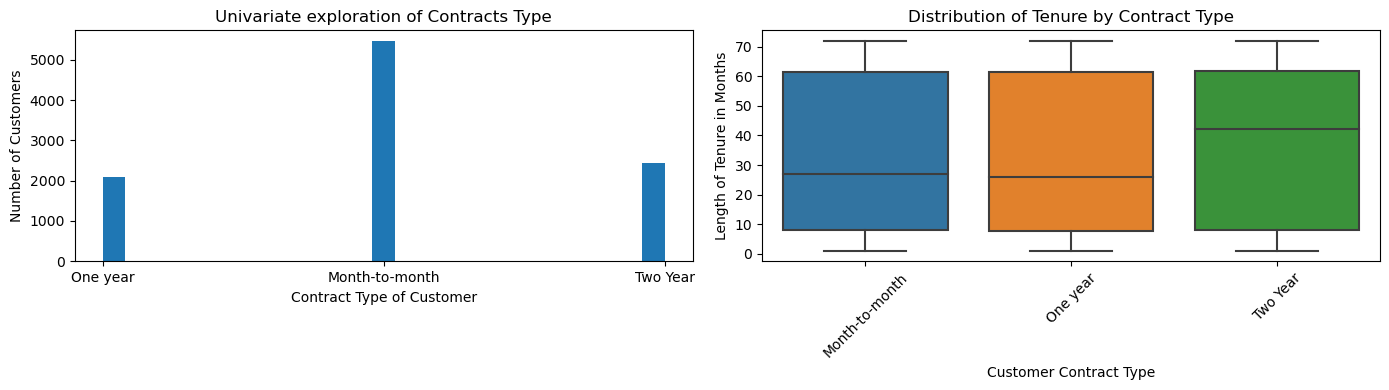

In [179]:
# Determine size of visualization
plt.figure(figsize = [14,4])

# First plot: Univariate exploration of Contracts
plt.subplot(1, 2, 1)
plt.title('Univariate exploration of Contracts Type')
Contract_counts = df["Contract"].value_counts()
Contract_labels = ["Month-to-month", "Two Year", "One year"]
plt.hist(x=df["Contract"], bins=25)
plt.xlabel('Contract Type of Customer')
plt.ylabel("Number of Customers")

# Second plot: Bivariate exploration of Contracts vs Tenure
plt.subplot(1, 2, 2)
plt.title("Distribution of Tenure by Contract Type")
sns.boxplot(data=df, x="Contract", y="Tenure")
plt.xlabel("Customer Contract Type")
plt.ylabel("Length of Tenure in Months")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x400 with 0 Axes>

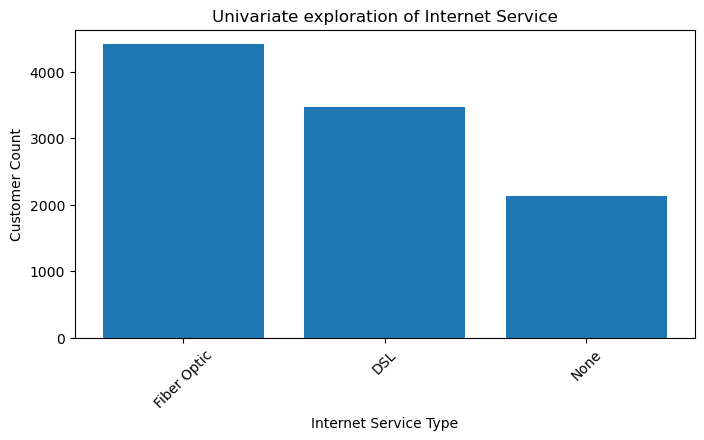

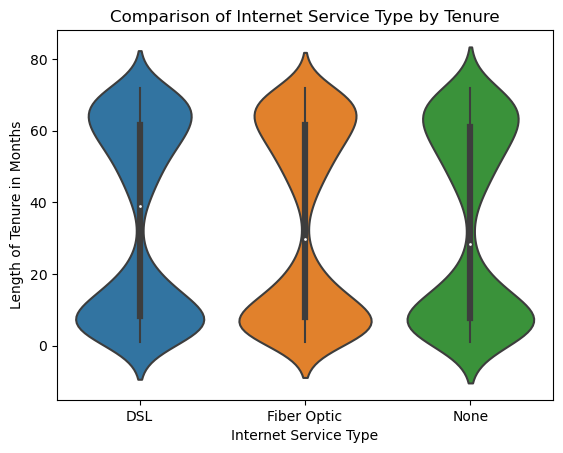

In [180]:
# Determine size of visualization
plt.figure(figsize = [14,4])

# First plot: Univariate exploration of Internet Service
Internet_Service_counts = df["Internet_Service"].value_counts()
plt.figure(figsize=(8, 4))
plt.bar(Internet_Service_counts.index, Internet_Service_counts.values)
plt.title("Univariate exploration of Internet Service")
plt.xlabel("Internet Service Type")
plt.ylabel("Customer Count")
plt.xticks(rotation=45)
plt.show()

# Second plot: Bivariate exploration of Service Type vs. Tenure
sns.violinplot(x='Internet_Service', y='Tenure', data=df)
plt.xlabel('Internet Service Type')
plt.ylabel('Length of Tenure in Months')
plt.title('Comparison of Internet Service Type by Tenure')
plt.show()

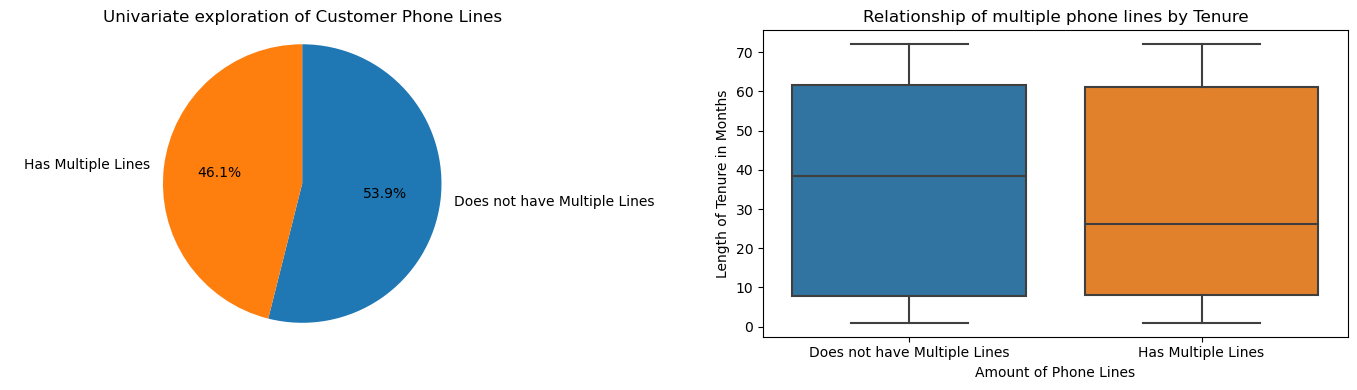

In [181]:
# Determine size of visualization
plt.figure(figsize = [14,4])

# First plot: Univariate exploration of variable "Multiple"
plt.subplot(1, 2, 1)
plt.title("Univariate exploration of Customer Phone Lines")
Multiple_counts = model_df['Multiple'].value_counts()
Multiple_labels = ["Does not have Multiple Lines", "Has Multiple Lines"]
plt.pie(Multiple_counts, labels=Multiple_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('equal')  

# Second plot: Bivariate exploration of Multiple Lines vs. Tenure
plt.subplot(1, 2, 2)
plt.title("Relationship of multiple phone lines by Tenure")
sns.boxplot(data=model_df, x="Multiple", y='Tenure')
plt.xticks(ticks=[0, 1], labels=Multiple_labels)
plt.xlabel("Amount of Phone Lines")
plt.ylabel("Length of Tenure in Months")
plt.tight_layout()
plt.show()

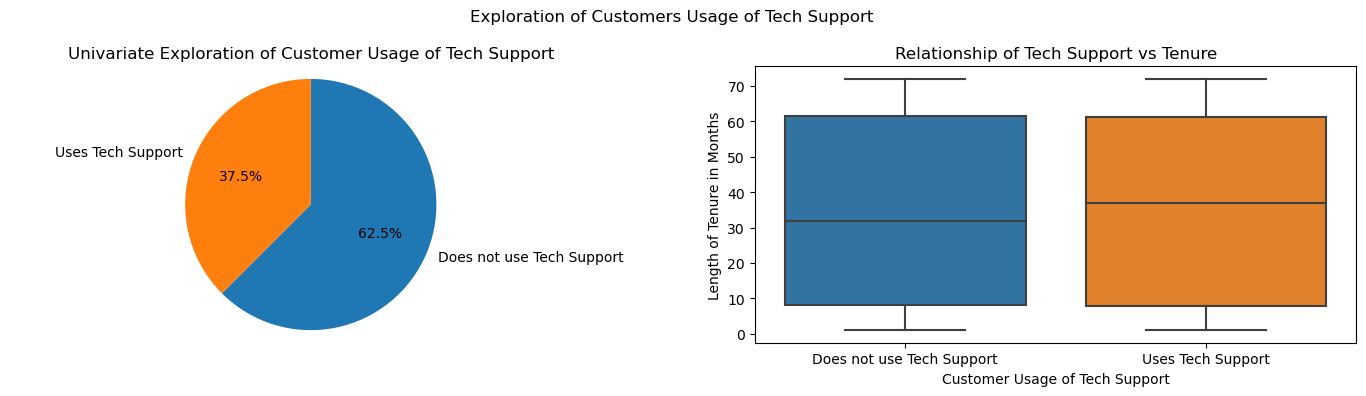

In [182]:
# Determine size and title of visualization
plt.figure(figsize = [14,4])
plt.suptitle("Exploration of Customers Usage of Tech Support")

# First plot: Univariate exploration of variable Tech_Support
plt.subplot(1, 2, 1)
plt.title("Univariate Exploration of Customer Usage of Tech Support")
Tech_Support_counts = model_df['Tech_Support'].value_counts()
Tech_Support_labels = ["Does not use Tech Support", "Uses Tech Support"]
plt.pie(Tech_Support_counts, labels=Tech_Support_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('equal')  

# Second plot: Bivariate exploration of Tech Support vs Tenure
plt.subplot(1, 2, 2)
plt.title("Relationship of Tech Support vs Tenure")
sns.boxplot(data=model_df, x="Tech_Support", y='Tenure')
plt.xticks(ticks=[0, 1], labels=Tech_Support_labels)
plt.xlabel("Customer Usage of Tech Support")
plt.ylabel("Length of Tenure in Months")
plt.tight_layout()
plt.show()

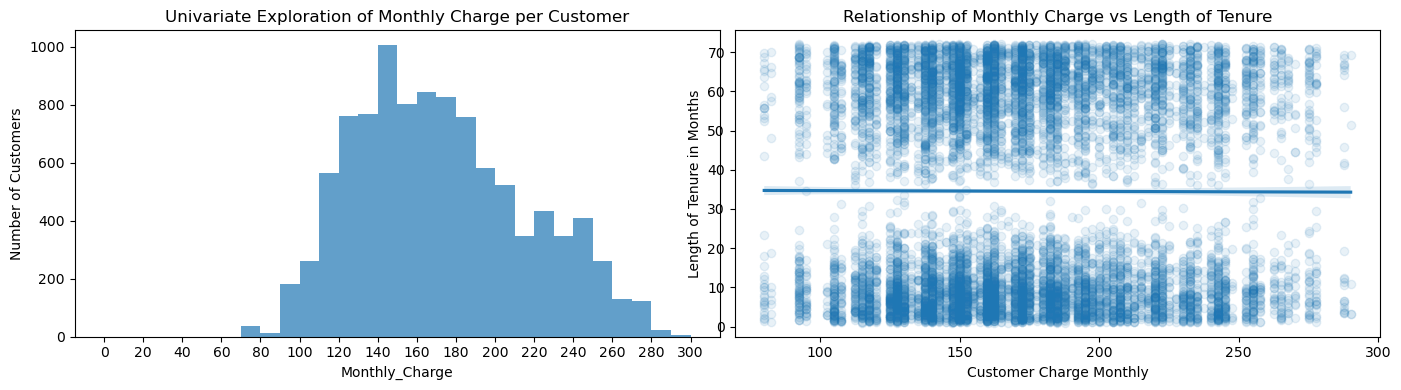

In [183]:
# Determine size of visualization
plt.figure(figsize = [14,4])

# First plot: Univariate exploration of Monthly Charge variable
plt.subplot(1, 2, 1)
plt.title('Univariate Exploration of Monthly Charge per Customer')
bins = np.arange(0, df.Monthly_Charge.max() + 10, 10)
plt.hist(data=model_df, x="Monthly_Charge", bins=bins, alpha=0.7)
plt.xlabel('Monthly_Charge')
plt.ylabel("Number of Customers")
plt.xticks(np.arange(0, df['Monthly_Charge'].max() + 10, 20))
plt.tight_layout()

# Second plot: A plot for the Bivariate exploration of Monthly Charge vs Tenure
plt.subplot(1, 2, 2)
plt.title("Relationship of Monthly Charge vs Length of Tenure")
sns.regplot(data=model_df, x="Monthly_Charge", y="Tenure", scatter_kws={'alpha' : 1/10})
plt.xlabel("Customer Charge Monthly")
plt.ylabel("Length of Tenure in Months")
plt.show()

<Figure size 1400x400 with 0 Axes>

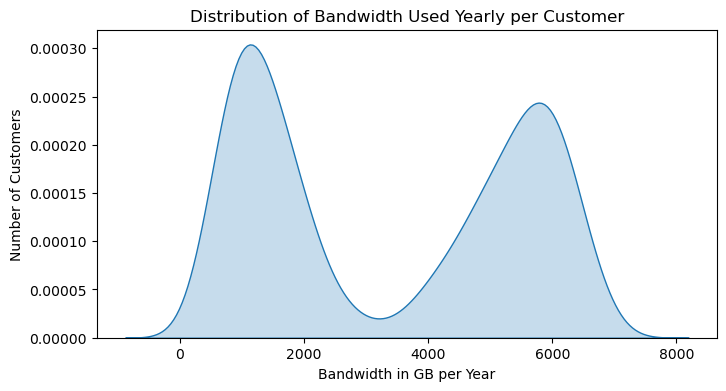

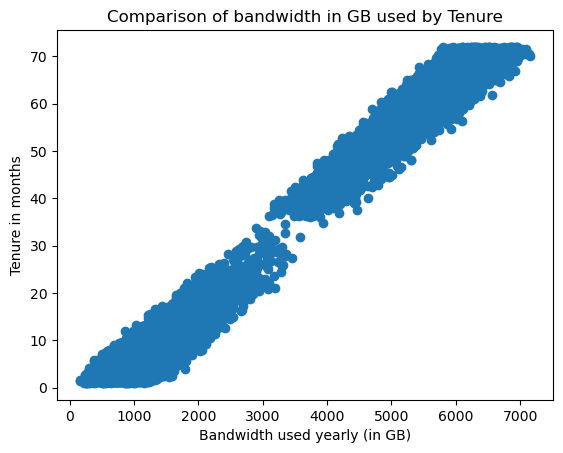

In [184]:
# Determine size of visualization
plt.figure(figsize = [14,4])

# First plot: Univariate exploration of Bandwidth Variable
plt.figure(figsize=(8, 4))
sns.kdeplot(model_df['Bandwidth_GB_Year'], fill=True)
plt.title("Distribution of Bandwidth Used Yearly per Customer")
plt.xlabel("Bandwidth in GB per Year")
plt.ylabel("Number of Customers")
plt.show()

# Second plot: Bivariate exploration of Bandwidth vs Tenure
plt.scatter(model_df['Bandwidth_GB_Year'], model_df['Tenure'])
plt.xlabel('Bandwidth used yearly (in GB)')
plt.ylabel('Tenure in months')
plt.title('Comparison of bandwidth in GB used by Tenure')
plt.show()

In [185]:
# Save wrangled/transformed dataframe
model_df.to_csv('model_df.csv', index=False)

In [186]:
# View data types and column information, dataframe as a whole
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           10000 non-null  int64  
 1   Income                        10000 non-null  float64
 2   Outage_sec_per_week           10000 non-null  float64
 3   Yearly_equip_failure          10000 non-null  int64  
 4   Multiple                      10000 non-null  int64  
 5   Tech_Support                  10000 non-null  int64  
 6   Tenure                        10000 non-null  float64
 7   Monthly_Charge                10000 non-null  float64
 8   Bandwidth_GB_Year             10000 non-null  float64
 9   Gender_Male                   10000 non-null  uint8  
 10  Gender_Nonbinary              10000 non-null  uint8  
 11  Marital_Married               10000 non-null  uint8  
 12  Marital_Never Married         10000 non-null  uint8  
 13  M

In [48]:
# Create model for Multiple Linear Regression
# Set dependent variable
y = model_df.Tenure
# Set independent variables
X = model_df[["Age", "Income" , "Outage_sec_per_week", "Yearly_equip_failure",
                "Multiple", "Tech_Support" , "Monthly_Charge", "Bandwidth_GB_Year" ,
                        "Gender_Male" , "Gender_Nonbinary" , "Marital_Married" , "Marital_Never Married" ,
                      "Marital_Separated" , "Marital_Widowed" , "Internet_Service_Fiber Optic" , "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]].assign(const=1)
model = sm.OLS(y, X)
reg_results = model.fit()
print(reg_results.summary())

# Retrieve residual standard error
reg_results.resid.std(ddof=X.shape[1])

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.121e+05
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:22:36   Log-Likelihood:                -13878.
No. Observations:               10000   AIC:                         2.779e+04
Df Residuals:                    9981   BIC:                         2.793e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Age             

0.9702197452097101

In [49]:
# Check for high multicollinearity (VIF > 5) among variables
X = model_df[["Age", "Income" , "Outage_sec_per_week", "Yearly_equip_failure",
                 "Multiple", "Tech_Support" , "Monthly_Charge", "Bandwidth_GB_Year" ,
                        "Gender_Male" , "Gender_Nonbinary" , "Marital_Married" , "Marital_Never Married" ,
                      "Marital_Separated" , "Marital_Widowed" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable        VIF
0                            Age   6.524852
1                         Income   2.857040
2            Outage_sec_per_week   9.503381
3           Yearly_equip_failure   1.383426
4                       Multiple   2.201175
5                   Tech_Support   1.638538
6                 Monthly_Charge  16.390106
7              Bandwidth_GB_Year   3.331884
8                    Gender_Male   1.909368
9               Gender_Nonbinary   1.045101
10               Marital_Married   1.821227
11         Marital_Never Married   1.834162
12             Marital_Separated   1.867104
13               Marital_Widowed   1.865264
14  Internet_Service_Fiber Optic   2.420401
15         Internet_Service_None   1.563068
16             Contract_One year   1.374498
17             Contract_Two Year   1.435734


In [50]:
# Remove Variable "Monthly_Charge" due to VIF value, re-check for high multicollinearity
X = model_df[["Age", "Income" , "Outage_sec_per_week", "Yearly_equip_failure",
                 "Multiple", "Tech_Support" , "Bandwidth_GB_Year" ,
                        "Gender_Male" , "Gender_Nonbinary" , "Marital_Married" , "Marital_Never Married" ,
                      "Marital_Separated" , "Marital_Widowed" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable       VIF
0                            Age  6.013390
1                         Income  2.797734
2            Outage_sec_per_week  8.123456
3           Yearly_equip_failure  1.380671
4                       Multiple  1.813058
5                   Tech_Support  1.571616
6              Bandwidth_GB_Year  3.158560
7                    Gender_Male  1.886602
8               Gender_Nonbinary  1.043724
9                Marital_Married  1.785993
10         Marital_Never Married  1.797085
11             Marital_Separated  1.822895
12               Marital_Widowed  1.824696
13  Internet_Service_Fiber Optic  2.158097
14         Internet_Service_None  1.562979
15             Contract_One year  1.366177
16             Contract_Two Year  1.430341


In [53]:
# Remove Variable "Outage_sec_per_week" due to VIF value, re-check for high multicollinearity
X = model_df[["Age", "Income" , "Yearly_equip_failure",
                 "Multiple", "Tech_Support" , "Bandwidth_GB_Year" ,
                        "Gender_Male" , "Gender_Nonbinary" , "Marital_Married" , "Marital_Never Married" ,
                      "Marital_Separated" , "Marital_Widowed" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable       VIF
0                            Age  5.247361
1                         Income  2.707416
2           Yearly_equip_failure  1.373020
3                       Multiple  1.783396
4                   Tech_Support  1.560069
5              Bandwidth_GB_Year  2.999005
6                    Gender_Male  1.849183
7               Gender_Nonbinary  1.041896
8                Marital_Married  1.715132
9          Marital_Never Married  1.741388
10             Marital_Separated  1.751765
11               Marital_Widowed  1.762666
12  Internet_Service_Fiber Optic  2.076508
13         Internet_Service_None  1.521913
14             Contract_One year  1.355906
15             Contract_Two Year  1.415629


In [54]:
# Remove Variable "Age" due to VIF value, re-check for high multicollinearity
X = model_df[["Income" , "Yearly_equip_failure",
                 "Multiple", "Tech_Support" , "Bandwidth_GB_Year" ,
                        "Gender_Male" , "Gender_Nonbinary" , "Marital_Married" , "Marital_Never Married" ,
                      "Marital_Separated" , "Marital_Widowed" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]]
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

                        Variable       VIF
0                         Income  2.584467
1           Yearly_equip_failure  1.361086
2                       Multiple  1.752980
3                   Tech_Support  1.533119
4              Bandwidth_GB_Year  2.825511
5                    Gender_Male  1.803762
6               Gender_Nonbinary  1.041229
7                Marital_Married  1.636399
8          Marital_Never Married  1.657109
9              Marital_Separated  1.667846
10               Marital_Widowed  1.680086
11  Internet_Service_Fiber Optic  1.975361
12         Internet_Service_None  1.471880
13             Contract_One year  1.344559
14             Contract_Two Year  1.403528


In [47]:
# Normalize the data to allow better interpretation of the results
scaler = MinMaxScaler()
norm_df = scaler.fit_transform(model_df) 
norm_df = pd.DataFrame(norm_df, columns=model_df.columns)
norm_df

,Age,Income,Outage_sec_per_week,Yearly_equip_failure,Multiple,Tech_Support,Tenure,Monthly_Charge,Bandwidth_GB_Year,Gender_Male,Gender_Nonbinary,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Internet_Service_Fiber Optic,Internet_Service_None,Contract_One year,Contract_Two Year
0,0.704225,0.109120,0.373283,0.166667,0.0,0.0,0.081624,0.440004,0.106951,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.126761,0.082599,0.549503,0.166667,1.0,0.0,0.002203,0.773861,0.092164,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.450704,0.035818,0.504500,0.166667,1.0,0.0,0.207804,0.380483,0.271180,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.422535,0.071848,0.701563,0.000000,0.0,0.0,0.226580,0.190218,0.286868,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.915493,0.153646,0.381336,0.166667,0.0,1.0,0.009447,0.332905,0.016560,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.070423,0.214174,0.441497,0.000000,1.0,0.0,0.946448,0.380626,0.907513,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.422535,0.130653,0.314543,0.000000,1.0,0.0,0.845647,0.606623,0.791099,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9997,0.422535,0.176501,0.307437,0.000000,1.0,0.0,0.653764,0.428157,0.571688,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,0.295775,0.063117,0.567030,0.000000,1.0,1.0,0.987272,0.821391,0.901403,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [55]:
# Begin backward elimination by checking OLS results for P-values
y = norm_df.Tenure
X = norm_df[["Income" , "Yearly_equip_failure",
                 "Multiple", "Tech_Support" , "Bandwidth_GB_Year" ,
                        "Gender_Male" , "Gender_Nonbinary" , "Marital_Married" , "Marital_Never Married" ,
                      "Marital_Separated" , "Marital_Widowed" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]].assign(const=1)

model01 = sm.OLS(y, X)
reg_results = model01.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.981e+04
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:23:14   Log-Likelihood:                 19663.
No. Observations:               10000   AIC:                        -3.929e+04
Df Residuals:                    9984   BIC:                        -3.918e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Income          

In [56]:
# Check OLS results for additional Backward Elimination after removing "Marital_Widowed" for P-value: 0.924
y = norm_df.Tenure
X = norm_df[["Income" , "Yearly_equip_failure",
                 "Multiple", "Tech_Support" , "Bandwidth_GB_Year" ,
                        "Gender_Male" , "Gender_Nonbinary" , "Marital_Married" , "Marital_Never Married" ,
                      "Marital_Separated" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]].assign(const=1)

model02 = sm.OLS(y, X)
reg_results = model02.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 8.551e+04
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:25:06   Log-Likelihood:                 19663.
No. Observations:               10000   AIC:                        -3.930e+04
Df Residuals:                    9985   BIC:                        -3.919e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Income          

In [58]:
# Check OLS results for additional Backward Elimination after removing Tech_Support for P-value: 0.825
y = norm_df.Tenure
X = norm_df[["Income" , "Yearly_equip_failure",
                 "Multiple" , "Bandwidth_GB_Year" ,
                        "Gender_Male" , "Gender_Nonbinary" , "Marital_Married" , "Marital_Never Married" ,
                      "Marital_Separated" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]].assign(const=1)

model03 = sm.OLS(y, X)
reg_results = model03.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 9.210e+04
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:28:01   Log-Likelihood:                 19663.
No. Observations:               10000   AIC:                        -3.930e+04
Df Residuals:                    9986   BIC:                        -3.920e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Income          

In [59]:
# Check OLS results for additional Backward Elimination after removing "Marital_Married" for P-value: 0.755
y = norm_df.Tenure
X = norm_df[["Income" , "Yearly_equip_failure",
                 "Multiple" , "Bandwidth_GB_Year" ,
                        "Gender_Male" , "Gender_Nonbinary" , "Marital_Never Married" ,
                      "Marital_Separated" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]].assign(const=1)

model04 = sm.OLS(y, X)
reg_results = model04.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 9.978e+04
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:29:06   Log-Likelihood:                 19663.
No. Observations:               10000   AIC:                        -3.930e+04
Df Residuals:                    9987   BIC:                        -3.921e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Income          

In [60]:
# Check OLS results for additional Backward Elimination after removing "Income" for P-value: 0.750
y = norm_df.Tenure
X = norm_df[[ "Yearly_equip_failure",
                 "Multiple" , "Bandwidth_GB_Year" ,
                        "Gender_Male" , "Gender_Nonbinary" , "Marital_Never Married" ,
                      "Marital_Separated" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]].assign(const=1)

model05 = sm.OLS(y, X)
reg_results = model05.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.089e+05
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:29:57   Log-Likelihood:                 19663.
No. Observations:               10000   AIC:                        -3.930e+04
Df Residuals:                    9988   BIC:                        -3.921e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Yearly_equip_fai

In [62]:
# Check OLS results for additional Backward Elimination after removing "Gender_Nonbinary" for P-value: 0.688
y = norm_df.Tenure
X = norm_df[["Yearly_equip_failure", "Multiple" , "Bandwidth_GB_Year" ,
                        "Gender_Male" , "Marital_Never Married" ,
                      "Marital_Separated" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]].assign(const=1)

model06 = sm.OLS(y, X)
reg_results = model06.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.198e+05
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:31:34   Log-Likelihood:                 19662.
No. Observations:               10000   AIC:                        -3.930e+04
Df Residuals:                    9989   BIC:                        -3.922e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Yearly_equip_fai

In [63]:
# Check OLS results for additional Backward Elimination after removing "Marital_Never Married" for P-value: 0.551
y = norm_df.Tenure
X = norm_df[["Yearly_equip_failure", "Multiple" , "Bandwidth_GB_Year" , "Gender_Male" ,
                      "Marital_Separated" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]].assign(const=1)

model07 = sm.OLS(y, X)
reg_results = model07.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.331e+05
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:32:40   Log-Likelihood:                 19662.
No. Observations:               10000   AIC:                        -3.930e+04
Df Residuals:                    9990   BIC:                        -3.923e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Yearly_equip_fai

In [65]:
# Check OLS results for additional Backward Elimination after removing "Yearly_equip_failure" for P-value: 0.275
y = norm_df.Tenure
X = norm_df[[ "Multiple" , "Bandwidth_GB_Year" , "Gender_Male" ,
                      "Marital_Separated" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year" , "Contract_Two Year"]].assign(const=1)

model08 = sm.OLS(y, X)
reg_results = model08.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.497e+05
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:34:20   Log-Likelihood:                 19662.
No. Observations:               10000   AIC:                        -3.931e+04
Df Residuals:                    9991   BIC:                        -3.924e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Multiple        

In [66]:
# Check OLS results for additional Backward Elimination after removing "Contract_Two Year" for P-value: 0.255
y = norm_df.Tenure
X = norm_df[["Multiple" , "Bandwidth_GB_Year" , "Gender_Male" ,
                      "Marital_Separated" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year"]].assign(const=1)

model09 = sm.OLS(y, X)
reg_results = model09.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.711e+05
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:35:36   Log-Likelihood:                 19661.
No. Observations:               10000   AIC:                        -3.931e+04
Df Residuals:                    9992   BIC:                        -3.925e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Multiple        

In [76]:
# Check OLS results for additional Backward Elimination after removing "Marital_Separated" for P-value: 0.154
y = norm_df.Tenure
X = norm_df[["Multiple" , "Bandwidth_GB_Year" , "Gender_Male" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None" , "Contract_One year"]].assign(const=1)

model10 = sm.OLS(y, X)
reg_results = model10.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.996e+05
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:23:56   Log-Likelihood:                 19660.
No. Observations:               10000   AIC:                        -3.931e+04
Df Residuals:                    9993   BIC:                        -3.926e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Multiple        

In [77]:
# Check OLS results for additional Backward Elimination after removing "Contract_One year" for P-value: 0.045
y = norm_df.Tenure
X = norm_df[["Multiple" , "Bandwidth_GB_Year" , "Gender_Male" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None"]].assign(const=1)

model11 = sm.OLS(y, X)
reg_results = model11.fit()
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.394e+05
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:24:28   Log-Likelihood:                 19658.
No. Observations:               10000   AIC:                        -3.930e+04
Df Residuals:                    9994   BIC:                        -3.926e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Multiple        

In [78]:
# Create the Reduced model
y = norm_df.Tenure
X = norm_df[["Multiple" , "Bandwidth_GB_Year" , "Gender_Male" , "Internet_Service_Fiber Optic" , 
              "Internet_Service_None"]].assign(const=1)

red_model = sm.OLS(y, X)
reg_results = red_model.fit()
print(reg_results.summary())

# Retrieve residual standard error for reduced model
reg_results.resid.std(ddof=X.shape[1])

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.394e+05
Date:                Mon, 21 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:24:39   Log-Likelihood:                 19658.
No. Observations:               10000   AIC:                        -3.930e+04
Df Residuals:                    9994   BIC:                        -3.926e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Multiple        

0.033896724786738164

In [202]:
# Save final dataframe
norm_df.to_csv('norm_df.csv', index=False)

eval_env: 1


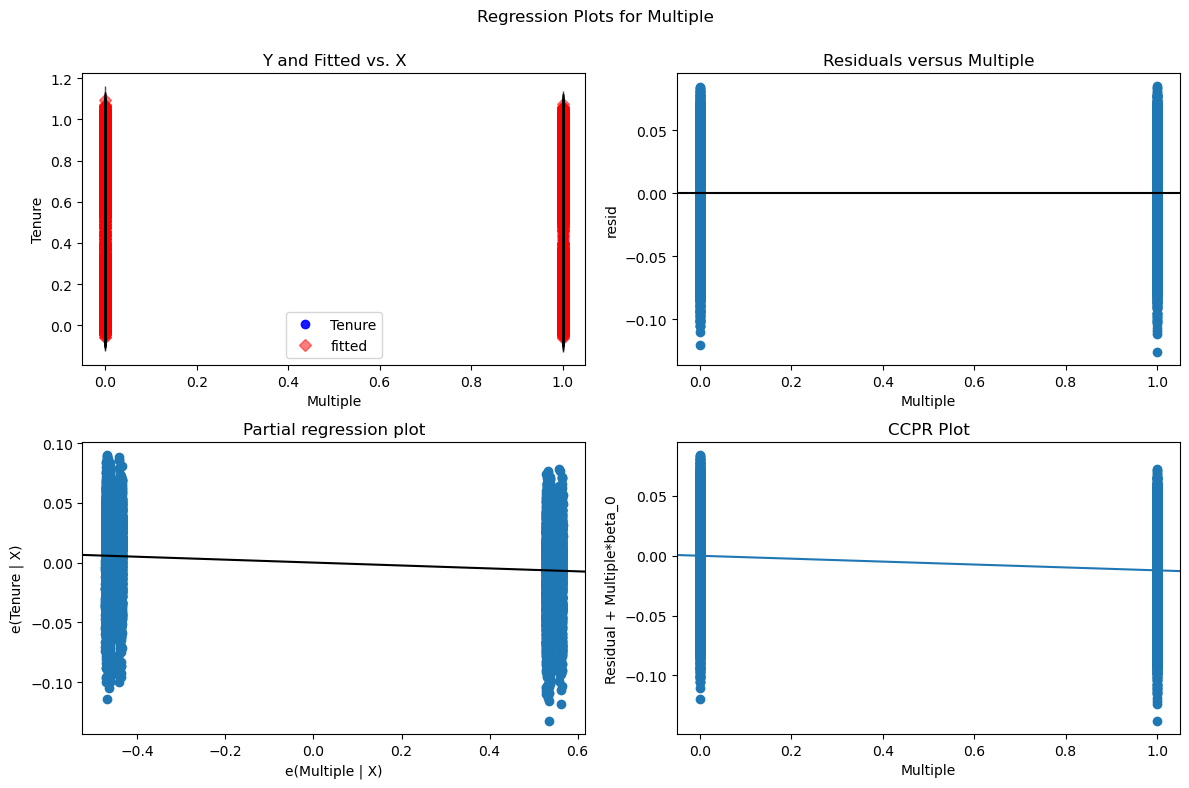

In [84]:
# Define figure size
fig = plt.figure(figsize = [12,8])

# Create Regression Plot for Multiple
sm.graphics.plot_regress_exog(reg_results, 'Multiple', fig=fig);

eval_env: 1


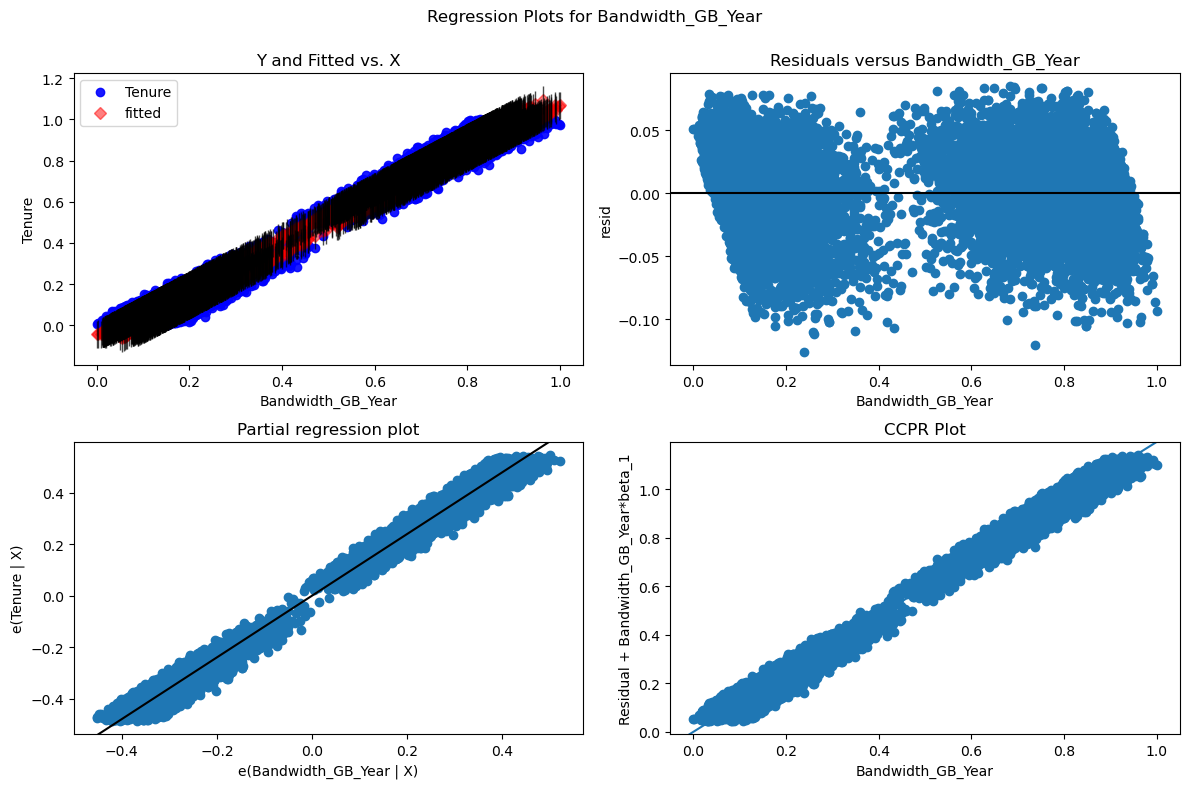

In [85]:
# Define figure size
fig = plt.figure(figsize = [12,8])

# Create Regression Plot for Bandwidth_GB_Year
sm.graphics.plot_regress_exog(reg_results, 'Bandwidth_GB_Year', fig=fig);

eval_env: 1


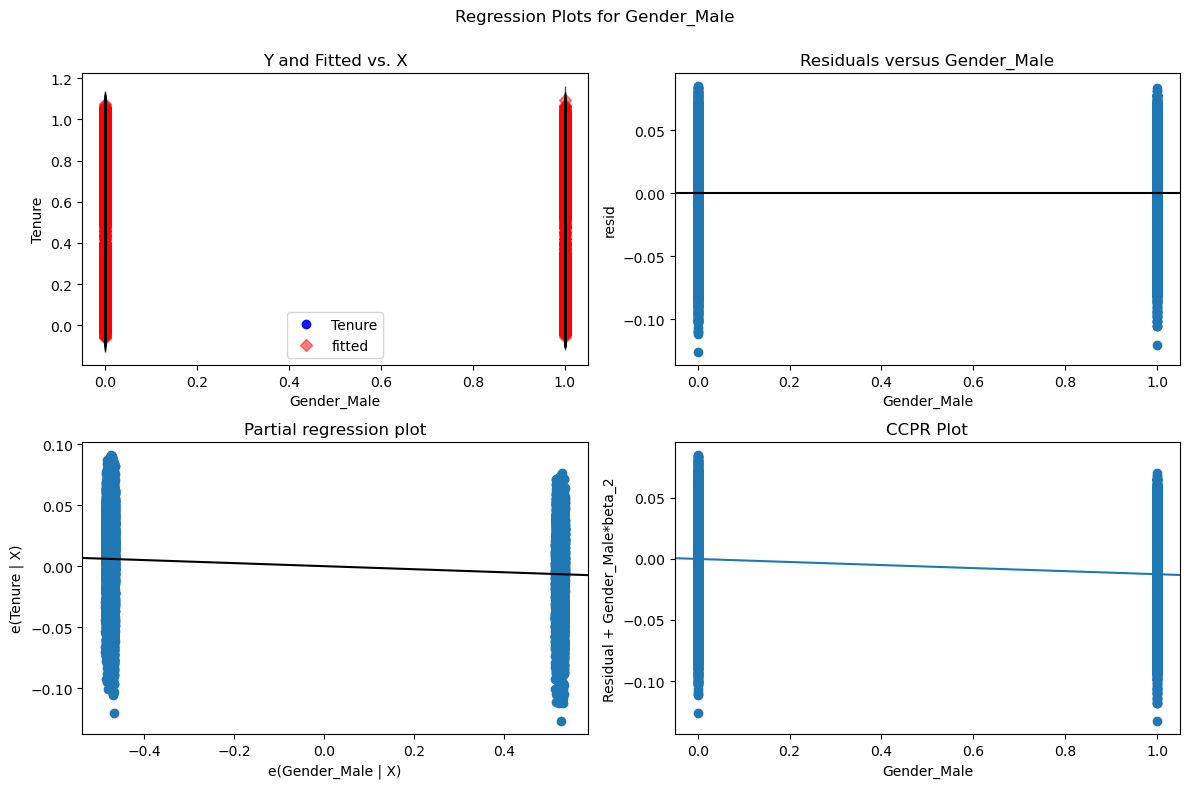

In [86]:
# Define figure size
fig = plt.figure(figsize = [12,8])

# Create Regression Plot for Gender_Male
sm.graphics.plot_regress_exog(reg_results, 'Gender_Male', fig=fig);

eval_env: 1


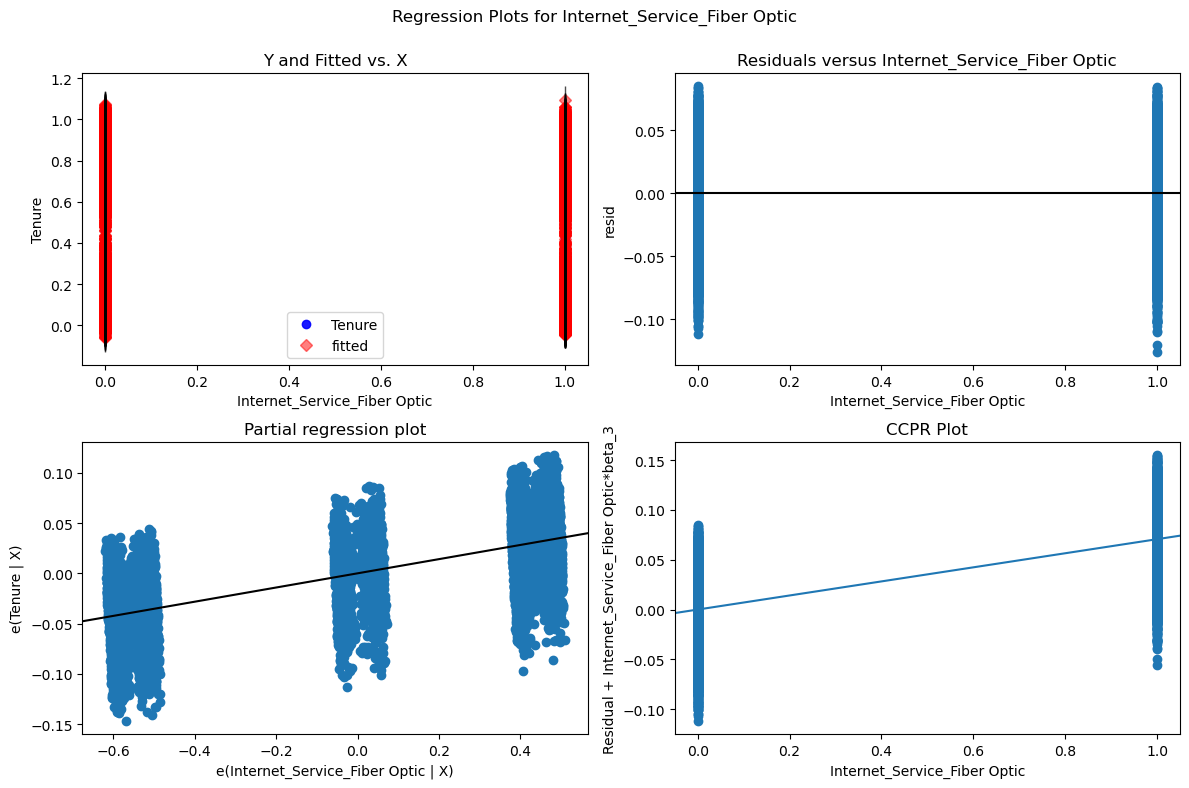

In [87]:
# Define figure size
fig = plt.figure(figsize = [12,8])

# Create Regression Plot for Internet_Service_Fiber Optic
sm.graphics.plot_regress_exog(reg_results, 'Internet_Service_Fiber Optic', fig=fig);

eval_env: 1


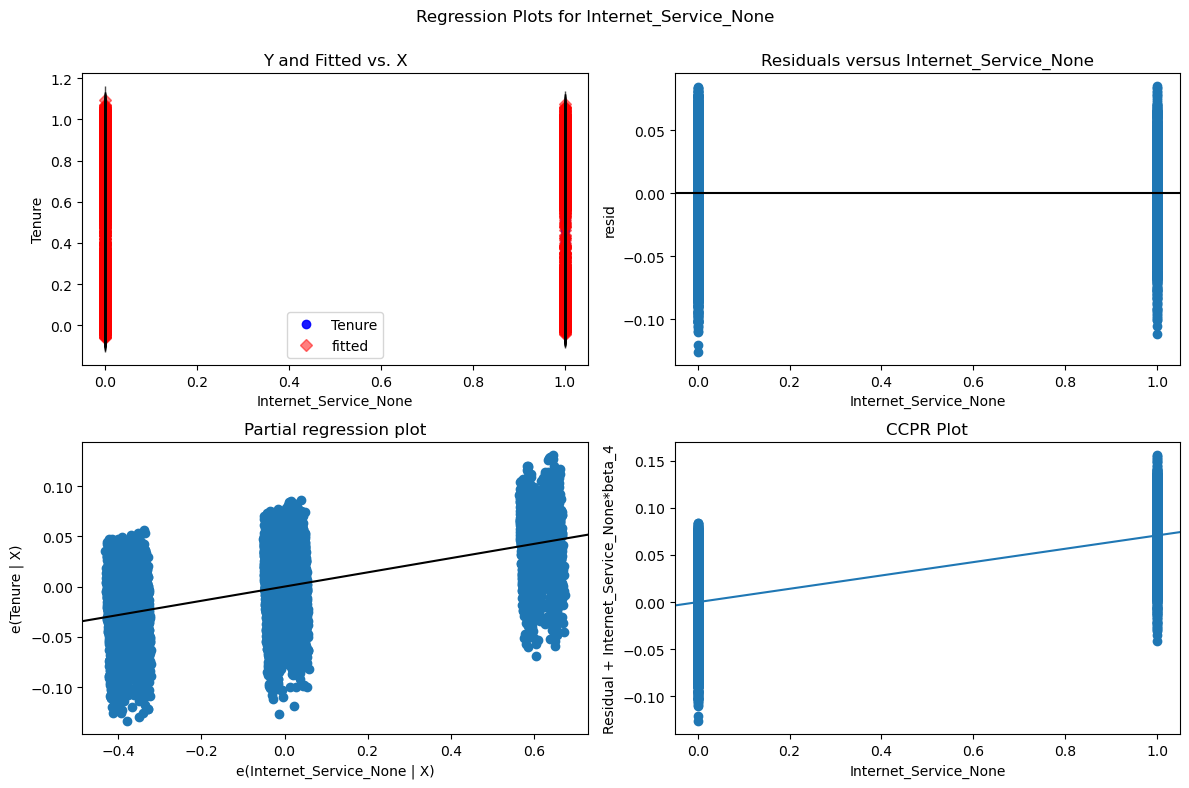

In [88]:
# Define figure size
fig = plt.figure(figsize = [12,8])

# Create Regression Plot for Internet_Service_None
sm.graphics.plot_regress_exog(reg_results, 'Internet_Service_None', fig=fig);